In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Load Dataset
train_path = r"/Users/astromeria/PycharmProjects/SPWLA_2021_Geolatinas/dataset/train_dataset_clean.csv"
train_data = pd.read_csv(train_path)
print(train_data)

discarded =  ["WELLNUM", "DEPTH"]
targets = ['PHIF', 'VSH', 'SW']
features = ["DTC","DTS","DEN","GR","NEU", "PEF","RDEP","RMED"]
train_data = train_data.drop(columns=discarded)
print(len(train_data))
train_data = train_data.dropna()
train_data = train_data.sample(n=1000,replace=False)
print(len(train_data))

#Normalize data



#separate in x (inputs) and y(targets or outputs)
x_train = train_data.loc[:, ~train_data.columns.isin(targets)]
y_train = train_data.loc[:, targets]

print(x_train)
print(y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))



       WELLNUM         DEPTH        DTC  DTS       DEN         GR       NEU  \
0            0  14121.660105   89.64610  NaN  2.577700   88.85730  0.277790   
1            0  14122.160105   96.01520  NaN  2.474800  120.89490  0.294806   
2            0  14122.660105  104.04570  NaN  2.333800  153.51950  0.447361   
3            0  14123.160105  113.50100  NaN  2.235800  182.85310  0.579637   
4            0  14123.660105  117.78170  NaN  2.227800  256.19600  0.556317   
...        ...           ...        ...  ...       ...        ...       ...   
42304        8  12142.500000   64.57612  NaN  2.613020   32.91600  0.109335   
42305        8  12143.000000   66.20669  NaN  2.614332   28.76523  0.099368   
42306        8  12143.500000   67.43187  NaN  2.620479   25.70403  0.097774   
42307        8  12144.000000   66.56465  NaN  2.623435   22.94222  0.089295   
42308        8  12144.500000   66.92158  NaN  2.617516   22.30438  0.091876   

           PEF      RDEP      RMED      PHIF   SW  

In [3]:
#model
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(y_train.keys()))
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=[ tf.keras.metrics.RootMeanSquaredError()])
  return model

#create a model instance
model = build_model()

history = model.fit(
  x_train, y_train,
  epochs=100, validation_split = 0.1, verbose=2 #just 10% for validation to use most of the data on training
  )
explainer = shap.KernelExplainer(model.predict,x_train)
#explainer = shap.TreeExplainer(model)


Epoch 1/100


2022-01-22 16:32:06.217991: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-22 16:32:06.260400: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


24/24 - 1s - loss: 0.1149 - root_mean_squared_error: 0.3390 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1570
Epoch 2/100
24/24 - 0s - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 3/100
24/24 - 0s - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 4/100
24/24 - 0s - loss: 0.0060 - root_mean_squared_error: 0.0774 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0718
Epoch 5/100
24/24 - 0s - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0941
Epoch 6/100
24/24 - 0s - loss: 0.0044 - root_mean_squared_error: 0.0661 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614
Epoch 7/100
24/24 - 0s - loss: 0.0037 - root_mean_squared_error: 0.0610 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 8/100
24/24 - 0s - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0029 - val_root_mean_sq

Epoch 64/100
24/24 - 0s - loss: 7.6779e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 65/100
24/24 - 0s - loss: 8.0419e-04 - root_mean_squared_error: 0.0284 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 66/100
24/24 - 0s - loss: 9.2559e-04 - root_mean_squared_error: 0.0304 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0423
Epoch 67/100
24/24 - 0s - loss: 8.2879e-04 - root_mean_squared_error: 0.0288 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 68/100
24/24 - 0s - loss: 9.3683e-04 - root_mean_squared_error: 0.0306 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 69/100
24/24 - 0s - loss: 6.7850e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 70/100
24/24 - 0s - loss: 8.1349e-04 - root_mean_squared_error: 0.0285 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 71/100
24/24 - 0s - loss: 8.3545e-04 - root_mean_squared

Using 850 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [4]:
shap_values = explainer.shap_values(x_test,nsamples=200)

  0%|          | 0/150 [00:00<?, ?it/s]

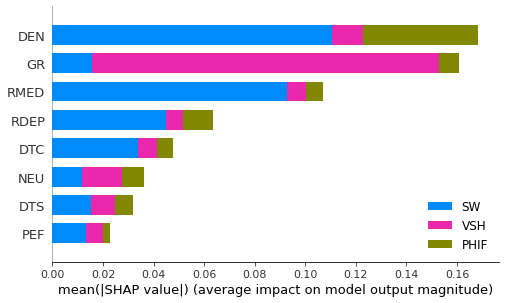

In [5]:
shap.summary_plot(shap_values,x_test,feature_names=features, class_names = targets)